In [1]:
import pandas as pd

In [2]:
dados=pd.read_csv('Dados/aluguel_residencial.csv', sep=';')

In [4]:
# Criando lista de bairros de meu interesse
bairros = ['Copacabana', 'Tijuca', 'Barra da Tijuca', 'Ipanema']

In [9]:
# Deixando no Dataframe só os dados que eu quero, de acordo com a lista que criei
sel=dados.Bairro.isin(bairros)
dados=dados[sel]


In [10]:
# Agupando os dados pelo atributo que eu quero
grupo_bairro=dados.groupby('Bairro')

In [13]:
grupo_bairro.Valor.mean().round(2)

Bairro
Barra da Tijuca    7071.92
Copacabana         4135.91
Ipanema            9375.91
Tijuca             2042.19
Name: Valor, dtype: float64

In [14]:
grupo_bairro.Valor.describe().round(2)

count     mean       std     min     25%     50%      75%  \
Bairro                                                                        
Barra da Tijuca  3922.0  7071.92  11803.49     0.0  2500.0  4500.0   8500.0   
Copacabana       2760.0  4135.91   3596.62     0.0  2000.0  3000.0   4800.0   
Ipanema          1800.0  9375.91   8224.56  1200.0  4500.0  7000.0  11000.0   
Tijuca           1113.0  2042.19   1655.30   750.0  1500.0  1800.0   2300.0   

                      max  
Bairro                     
Barra da Tijuca  600000.0  
Copacabana        35000.0  
Ipanema           90000.0  
Tijuca            45000.0

In [17]:
grupo_bairro.Valor.aggregate(['min', 'max', 'mean']).rename(columns={'min':'Mínimo', 'max':'Máximo', 'mean':'Média'})

Mínimo    Máximo        Média
Bairro                                        
Barra da Tijuca     0.0  600000.0  7071.918154
Copacabana          0.0   35000.0  4135.914493
Ipanema          1200.0   90000.0  9375.905000
Tijuca            750.0   45000.0  2042.194070

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(30,30))

Text(0.5,1,'Desvio Padrão do Valor por Bairro')

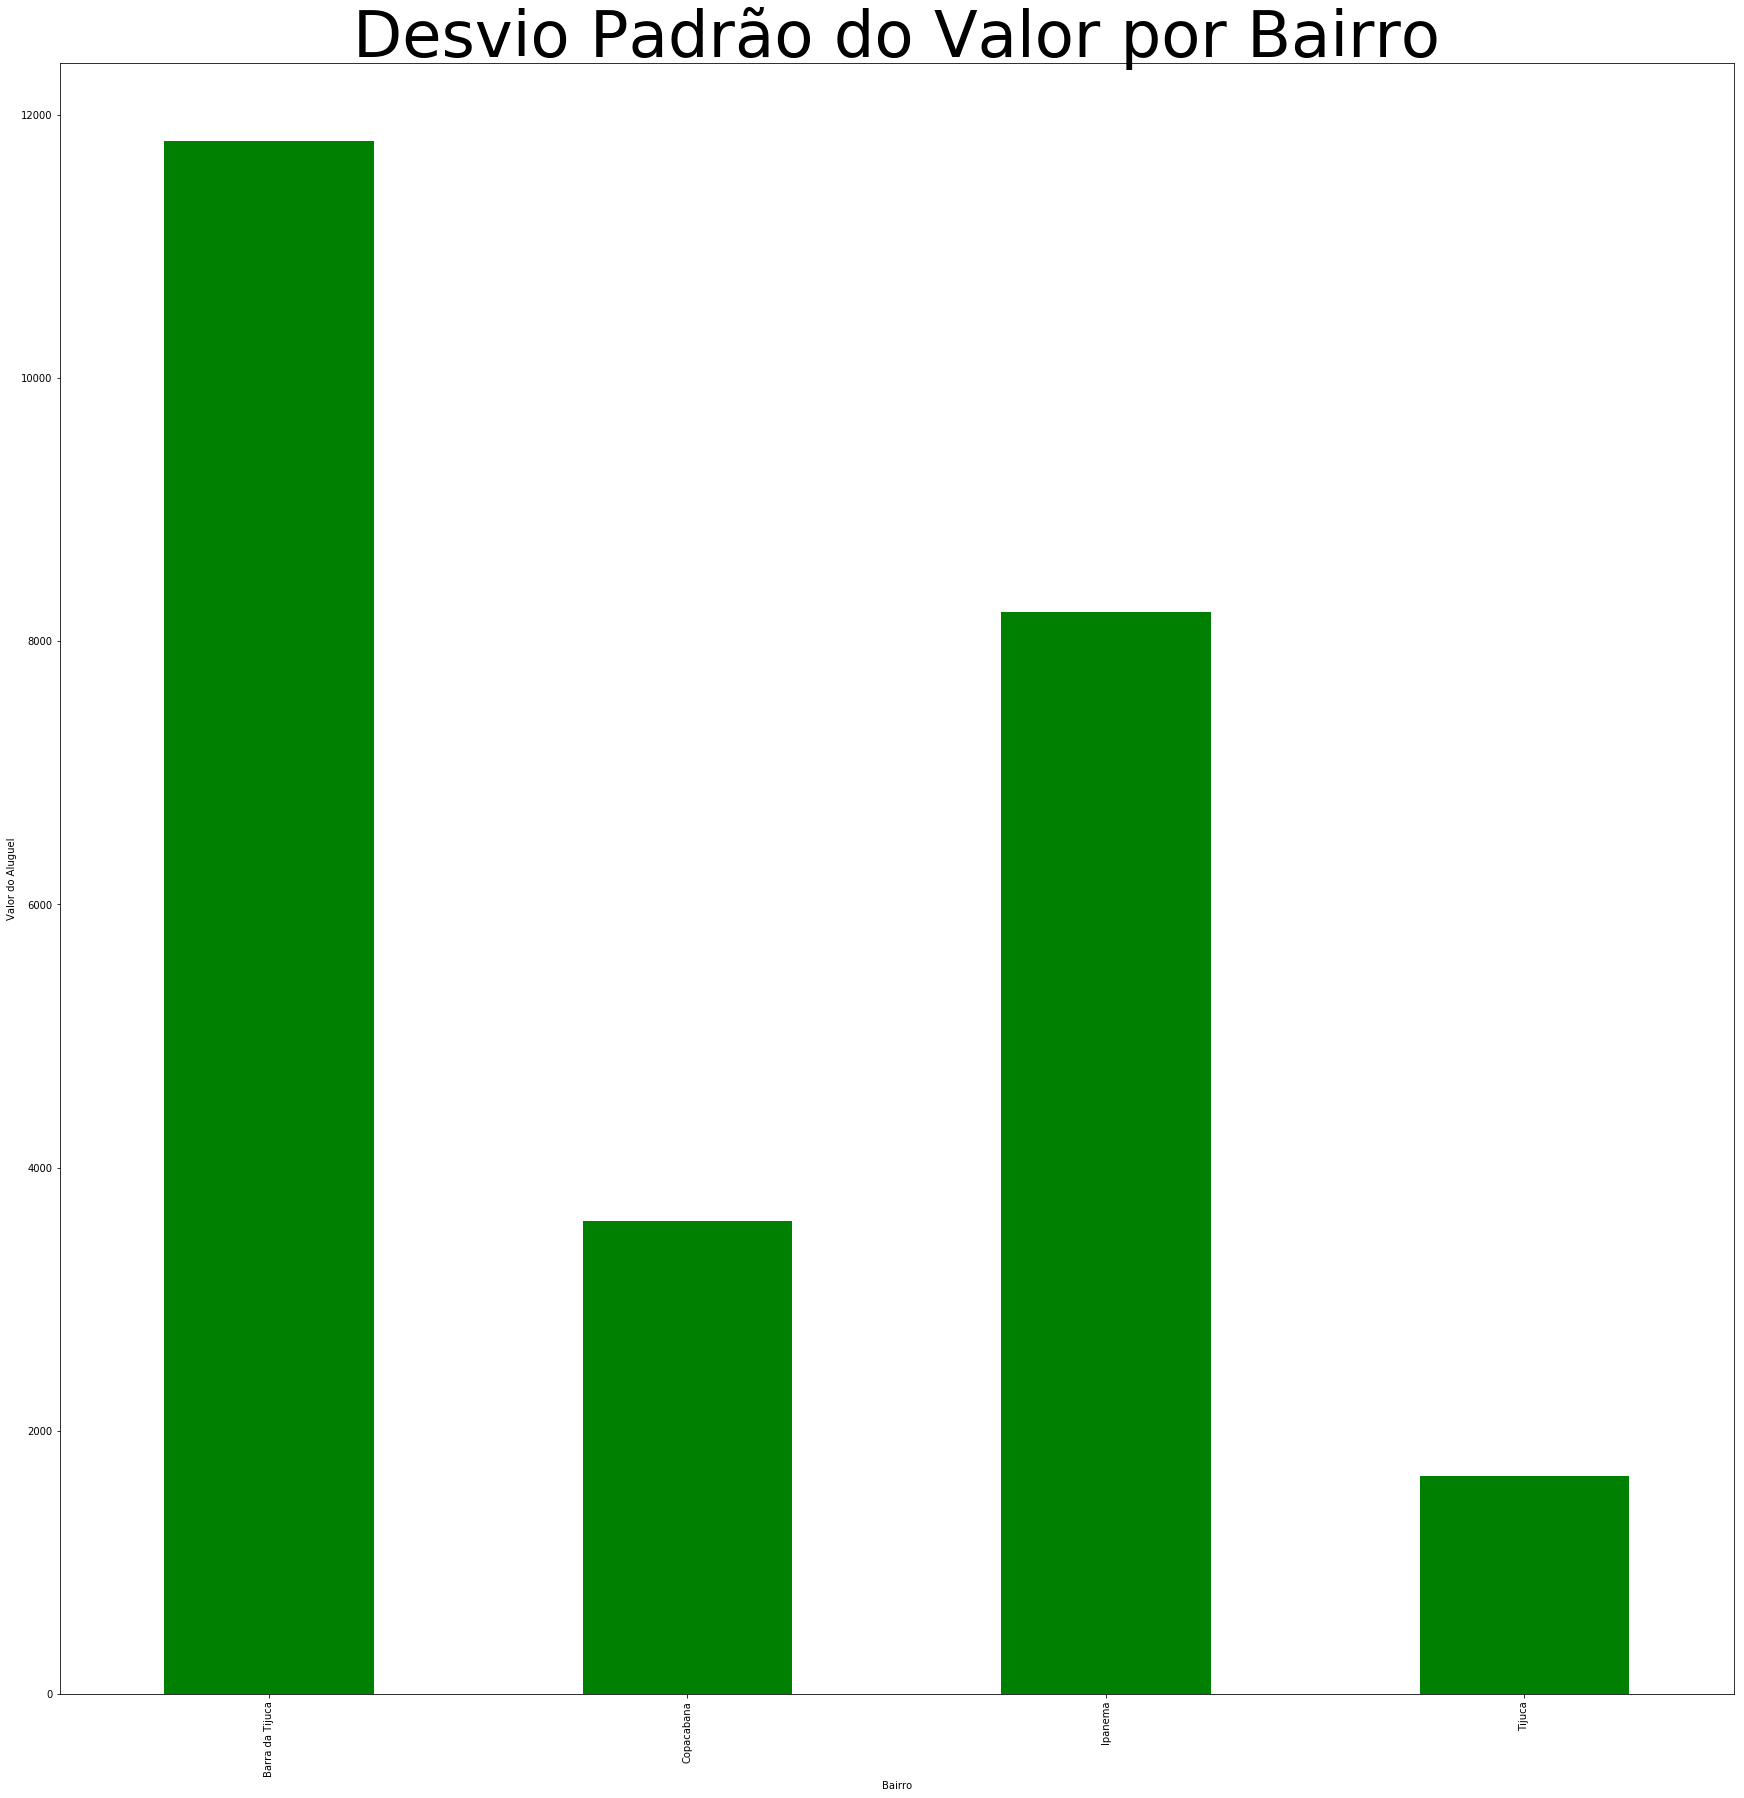

In [35]:
fig=grupo_bairro.Valor.std().plot.bar(color='green')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Desvio Padrão do Valor por Bairro',{'fontsize':64})

In [36]:
classes=[0,2,4,6,100]

In [50]:
quartos=pd.cut(dados.Quartos, classes)

In [38]:
quartos.head()

0     (0, 2]
6     (4, 6]
11    (0, 2]
12    (0, 2]
13    (2, 4]
Name: Quartos, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [40]:
pd.value_counts(quartos)

(2, 4]      4905
(0, 2]      4189
(4, 6]       428
(6, 100]      23
Name: Quartos, dtype: int64

In [41]:
type(quartos)

pandas.core.series.Series

In [43]:
dados=pd.read_csv('Dados/aluguel_residencial.csv',sep=';')

In [108]:
def categorizar(quarto):
    if quarto>=4:
        return 'C'
    elif quarto>=2:
        return 'B'
    elif quarto>=0:
        return 'A'

In [109]:
dados['Categoria']=dados.Quartos.apply(categorizar)

In [110]:
dados.head(10)

Tipo           Bairro  Quartos  Vagas  Suites  Area    Valor  \
0           Quitinete       Copacabana        1      0       0    40   1700.0   
1                Casa  Jardim Botânico        2      0       1   100   7000.0   
2         Apartamento           Centro        1      0       0    15    800.0   
3         Apartamento     Higienópolis        1      0       0    48    800.0   
4         Apartamento     Vista Alegre        3      1       0    70   1200.0   
5         Apartamento         Cachambi        2      0       0    50   1300.0   
6  Casa de Condomínio  Barra da Tijuca        5      4       5   750  22000.0   
7  Casa de Condomínio            Ramos        2      2       0    65   1000.0   
8         Apartamento           Centro        1      0       0    36   1200.0   
9         Apartamento           Grajaú        2      1       0    70   1500.0   

   Condominio  IPTU  Valor m² Tipo Agregado Categoria  
0       500.0  60.0     42.50   Apartamento         A  
1         0.0   0.0     70.00          Casa         B  
2       390.0  20.0     53.33   Apartamento         A  
3       230.0   0.0     16.67   Apartamento         A  
4         0.0   0.0     17.14   Apartamento         B  
5       301.0  17.0     26.00   Apartamento         B  
6         0.0   0.0     29.33          Casa         C  
7         0.0   0.0     15.38          Casa         B  
8         0.0   0.0     33.33   Apartamento         A  
9       642.0  74.0     21.43   Apartamento         B

In [115]:
dados.groupby('Categoria').Valor.mean().round(2)

Categoria
A     1878.19
B     3701.58
C    13156.11
Name: Valor, dtype: float64